In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [271]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [272]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [273]:
df.shape

(39644, 61)

According to information from data df we need to
remove gaps form head of columns,drop unpredictable variables, reformatting type of channel and days of week columns (The columns consist of 0 and 1. we don't need them that way

In [218]:
print(df.columns.tolist())

['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', ' data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1   timedelta                       39644 non-null  float64
 2   n_tokens_title                  39644 non-null  float64
 3   n_tokens_content                39644 non-null  float64
 4   n_unique_tokens                 39644 non-null  float64
 5   n_non_stop_words                39644 non-null  float64
 6   n_non_stop_unique_tokens        39644 non-null  float64
 7   num_hrefs                       39644 non-null  float64
 8   num_self_hrefs                  39644 non-null  float64
 9   num_imgs                        39644 non-null  float64
 10  num_videos                      39644 non-null  float64
 11  average_token_length            39644 non-null  float64
 12  num_keywords                    

In [220]:
df.isna().sum()

url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
                               ..
title_subjectivity              0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
shares                          0
Length: 61, dtype: int64

In [274]:
cl = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday']
weekday = [1, 2, 3, 4, 5, 6, 7]
for i in range(0,7):
    df[cl[i]] = df[cl[i]].replace({1.0: weekday[i], 0.0: np.nan})

df['weekdays'] = df[cl].sum(axis=1).astype('int64')

In [275]:
print(df['weekdays'].value_counts())

3    7435
2    7390
4    7267
1    6661
5    5701
7    2737
6    2453
Name: weekdays, dtype: int64


In [276]:
#removing white spaces from variable names
df.columns = df.columns.str.lstrip()

In [277]:
cl2 = ['data_channel_is_lifestyle','data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world']
    
df["category"] = df[cl2].idxmax(axis=1)


df['category'] = df['category'].replace('data_channel_is_lifestyle', 1)
df['category'] = df['category'].replace('data_channel_is_entertainment', 2)
df['category'] = df['category'].replace('data_channel_is_bus', 3)
df['category'] = df['category'].replace('data_channel_is_socmed', 4)
df['category'] = df['category'].replace('data_channel_is_tech', 5)
df['category'] = df['category'].replace('data_channel_is_world', 6)

In [278]:
print(df['category'].value_counts())

6    8427
1    8233
5    7346
2    7057
3    6258
4    2323
Name: category, dtype: int64


In [279]:
#drop unnecessary columns
df2 = df.drop(['url','timedelta','data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world','weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 
               'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday','is_weekend'], axis=True)






In [280]:
df2.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,weekdays,category
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184,3.410251,3.473540
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749,1.763605,1.870146
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000,2.000000,2.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000,3.000000,3.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000,5.000000,5.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000,7.000000,6.000000


In [281]:
def plot_histogram(x):
    plt.hist(x, color='gray',alpha=0.5)
    plt.title("Histogram of'{var_name}".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

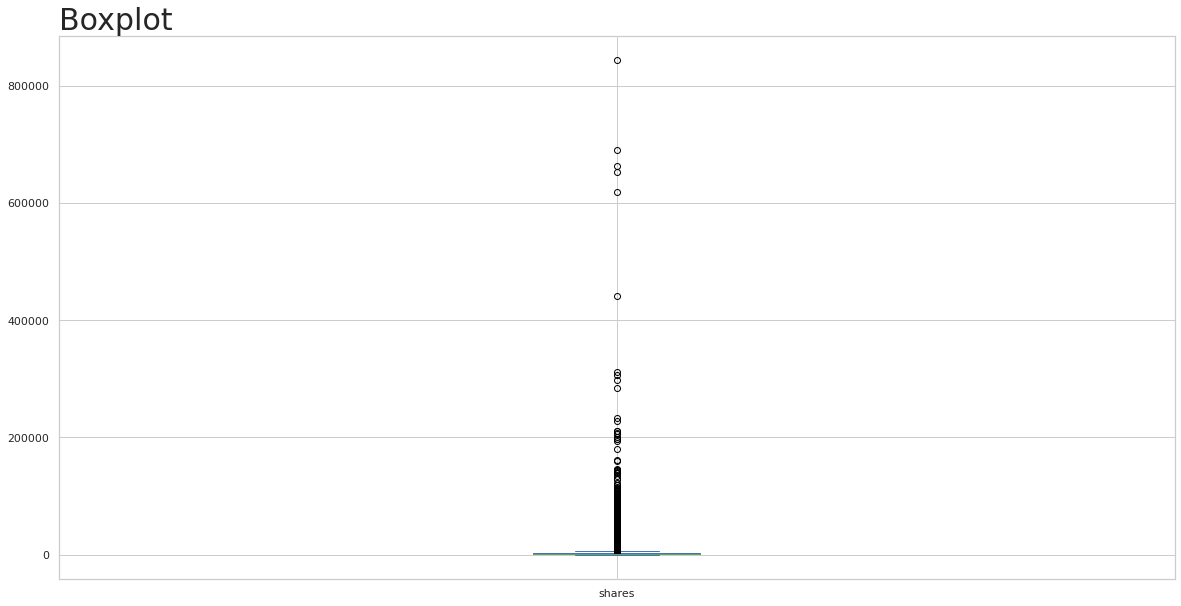

In [282]:
shares = df2[['shares']]
shares.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize = (20.0, 10.0))
plt.title("Boxplot",size=30,loc='left')
plt.show()

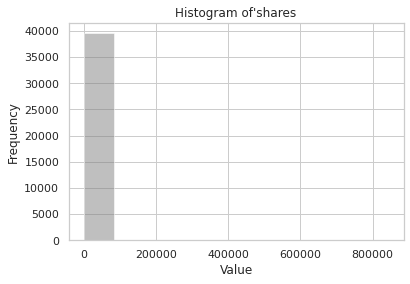

In [230]:
plot_histogram(df2['shares'])

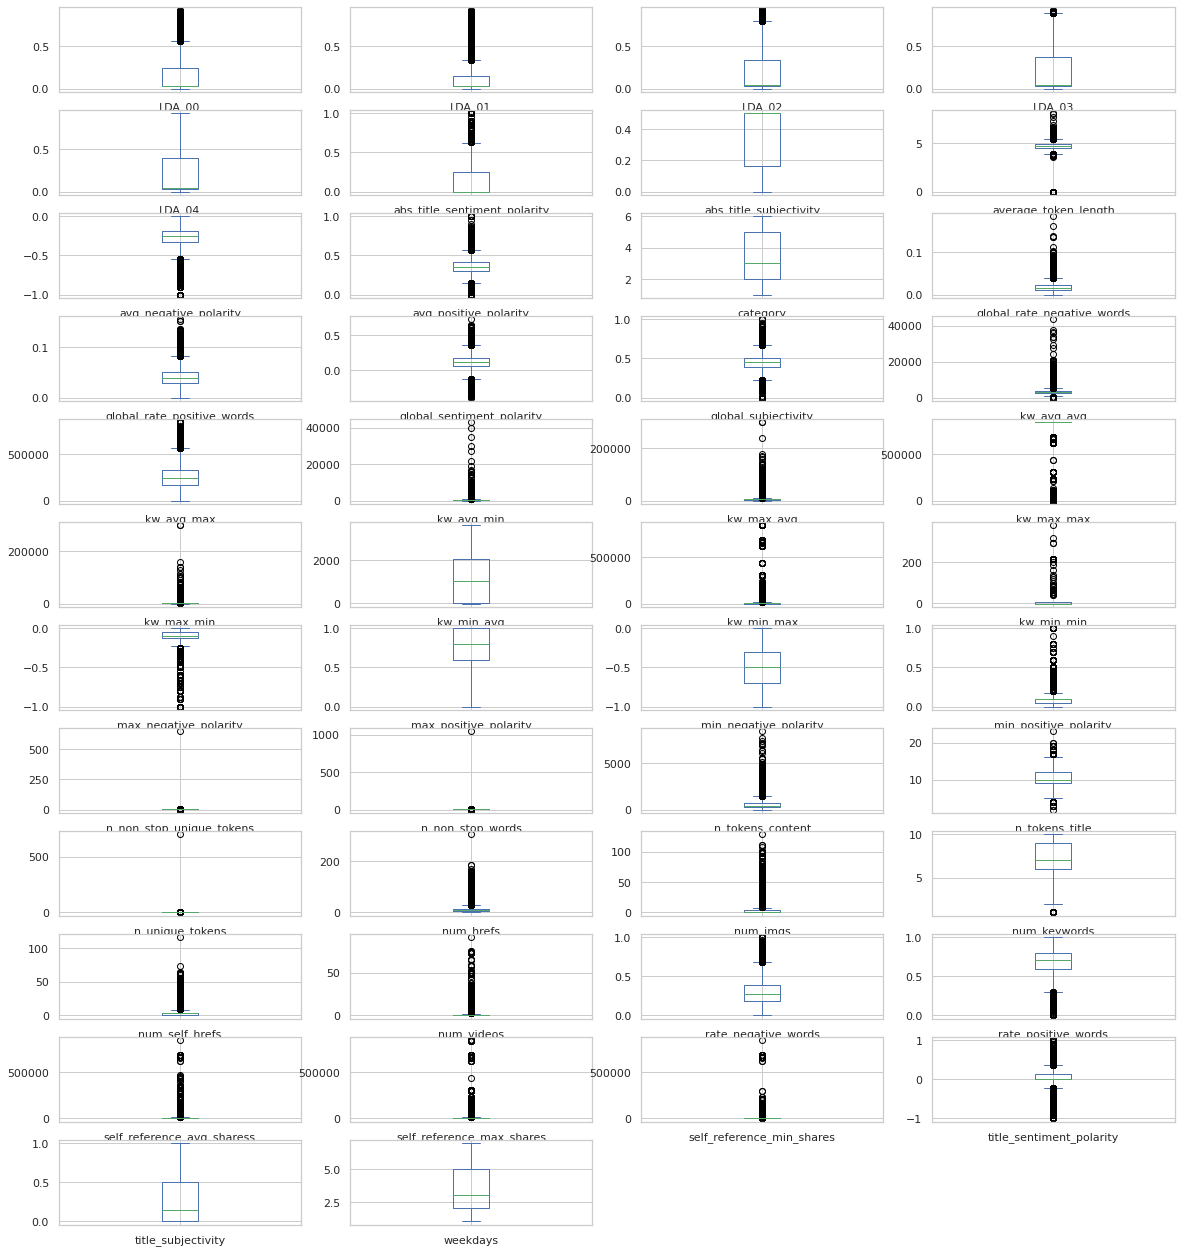

In [231]:
#Explanatory variables

df3 = df2[df2.columns.difference(['shares'])]
df3.plot(kind='box', subplots=True, layout=(16,4), sharex=False, sharey=False, figsize = (20.0, 30.0))
plt.show()

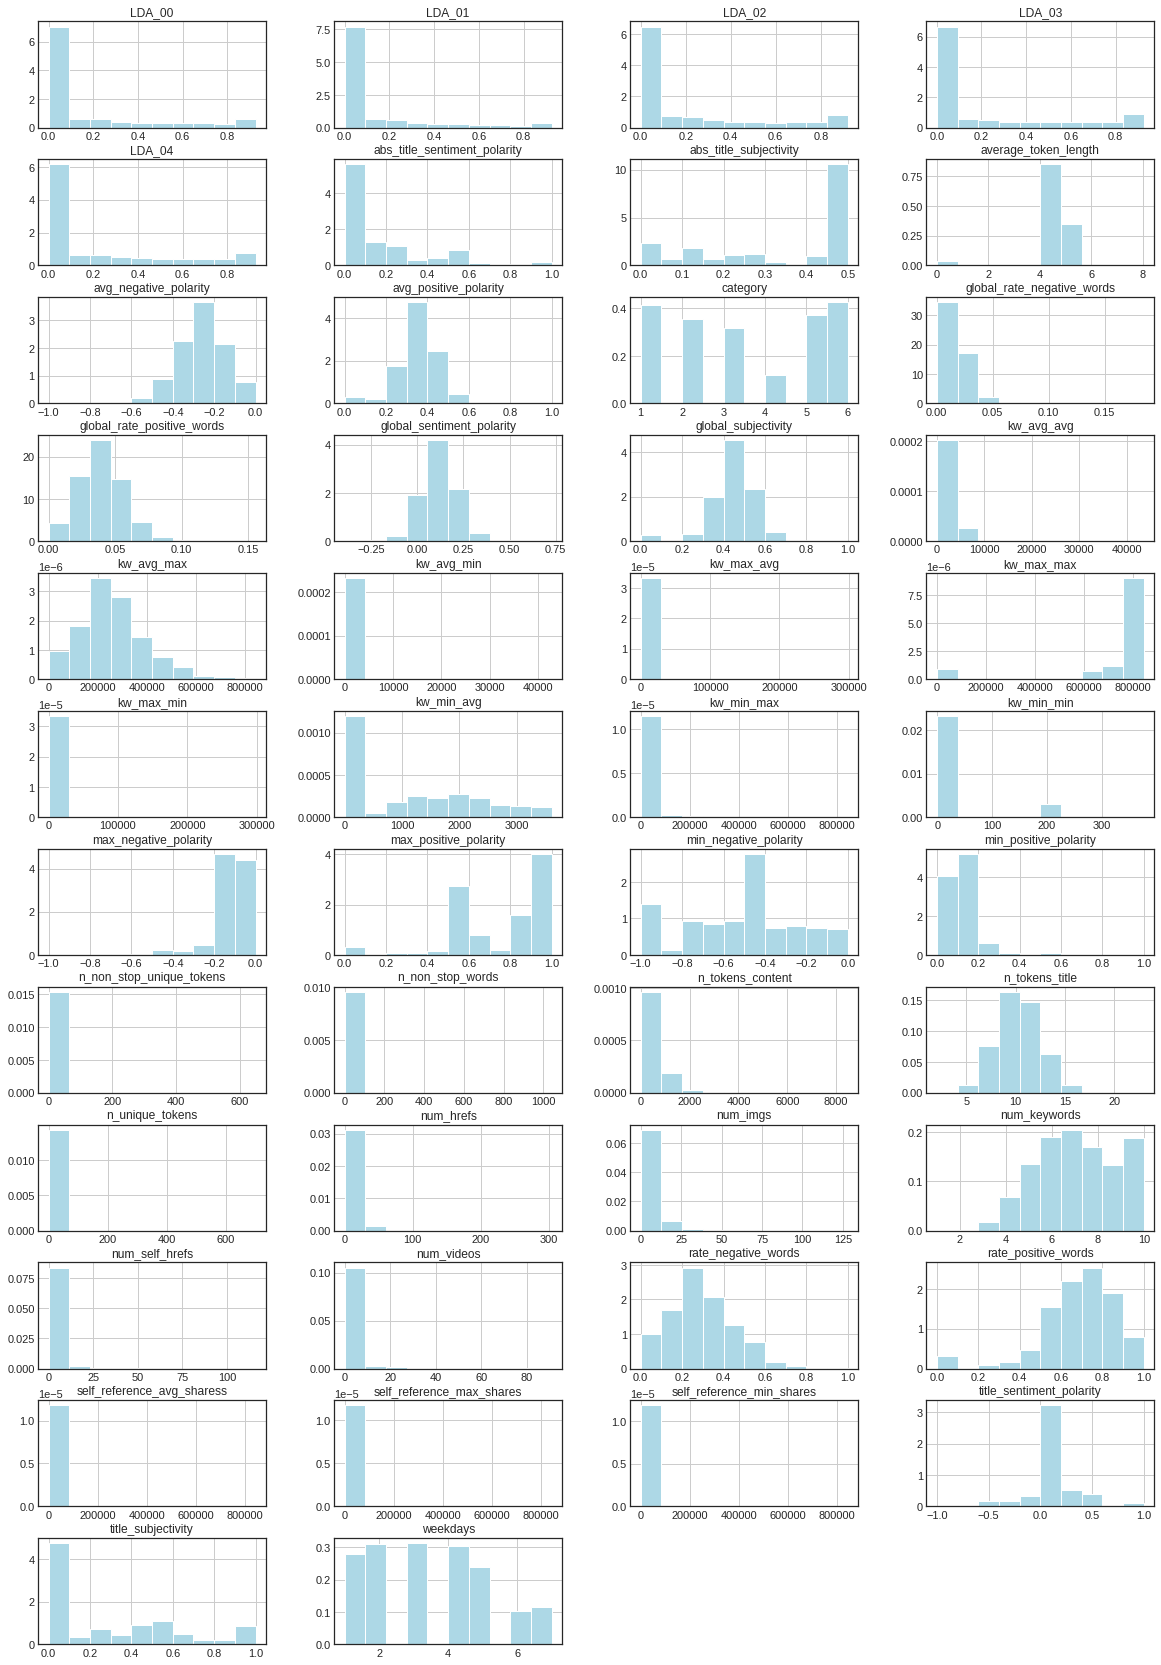

In [232]:
#As can be seen on the boxplots, many of our variables have many outliers. 
#We will need to deal with them, before applying any models to our data

plt.style.use('seaborn-white')
df3.hist(figsize = (20.0, 40.0),layout=(16,4), density = 1, color = 'lightblue')
plt.show()


In [233]:
#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
# In our case, the maroon shows very strong correlations. 
# The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1


pearsoncorr = df2.corr(method='pearson')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


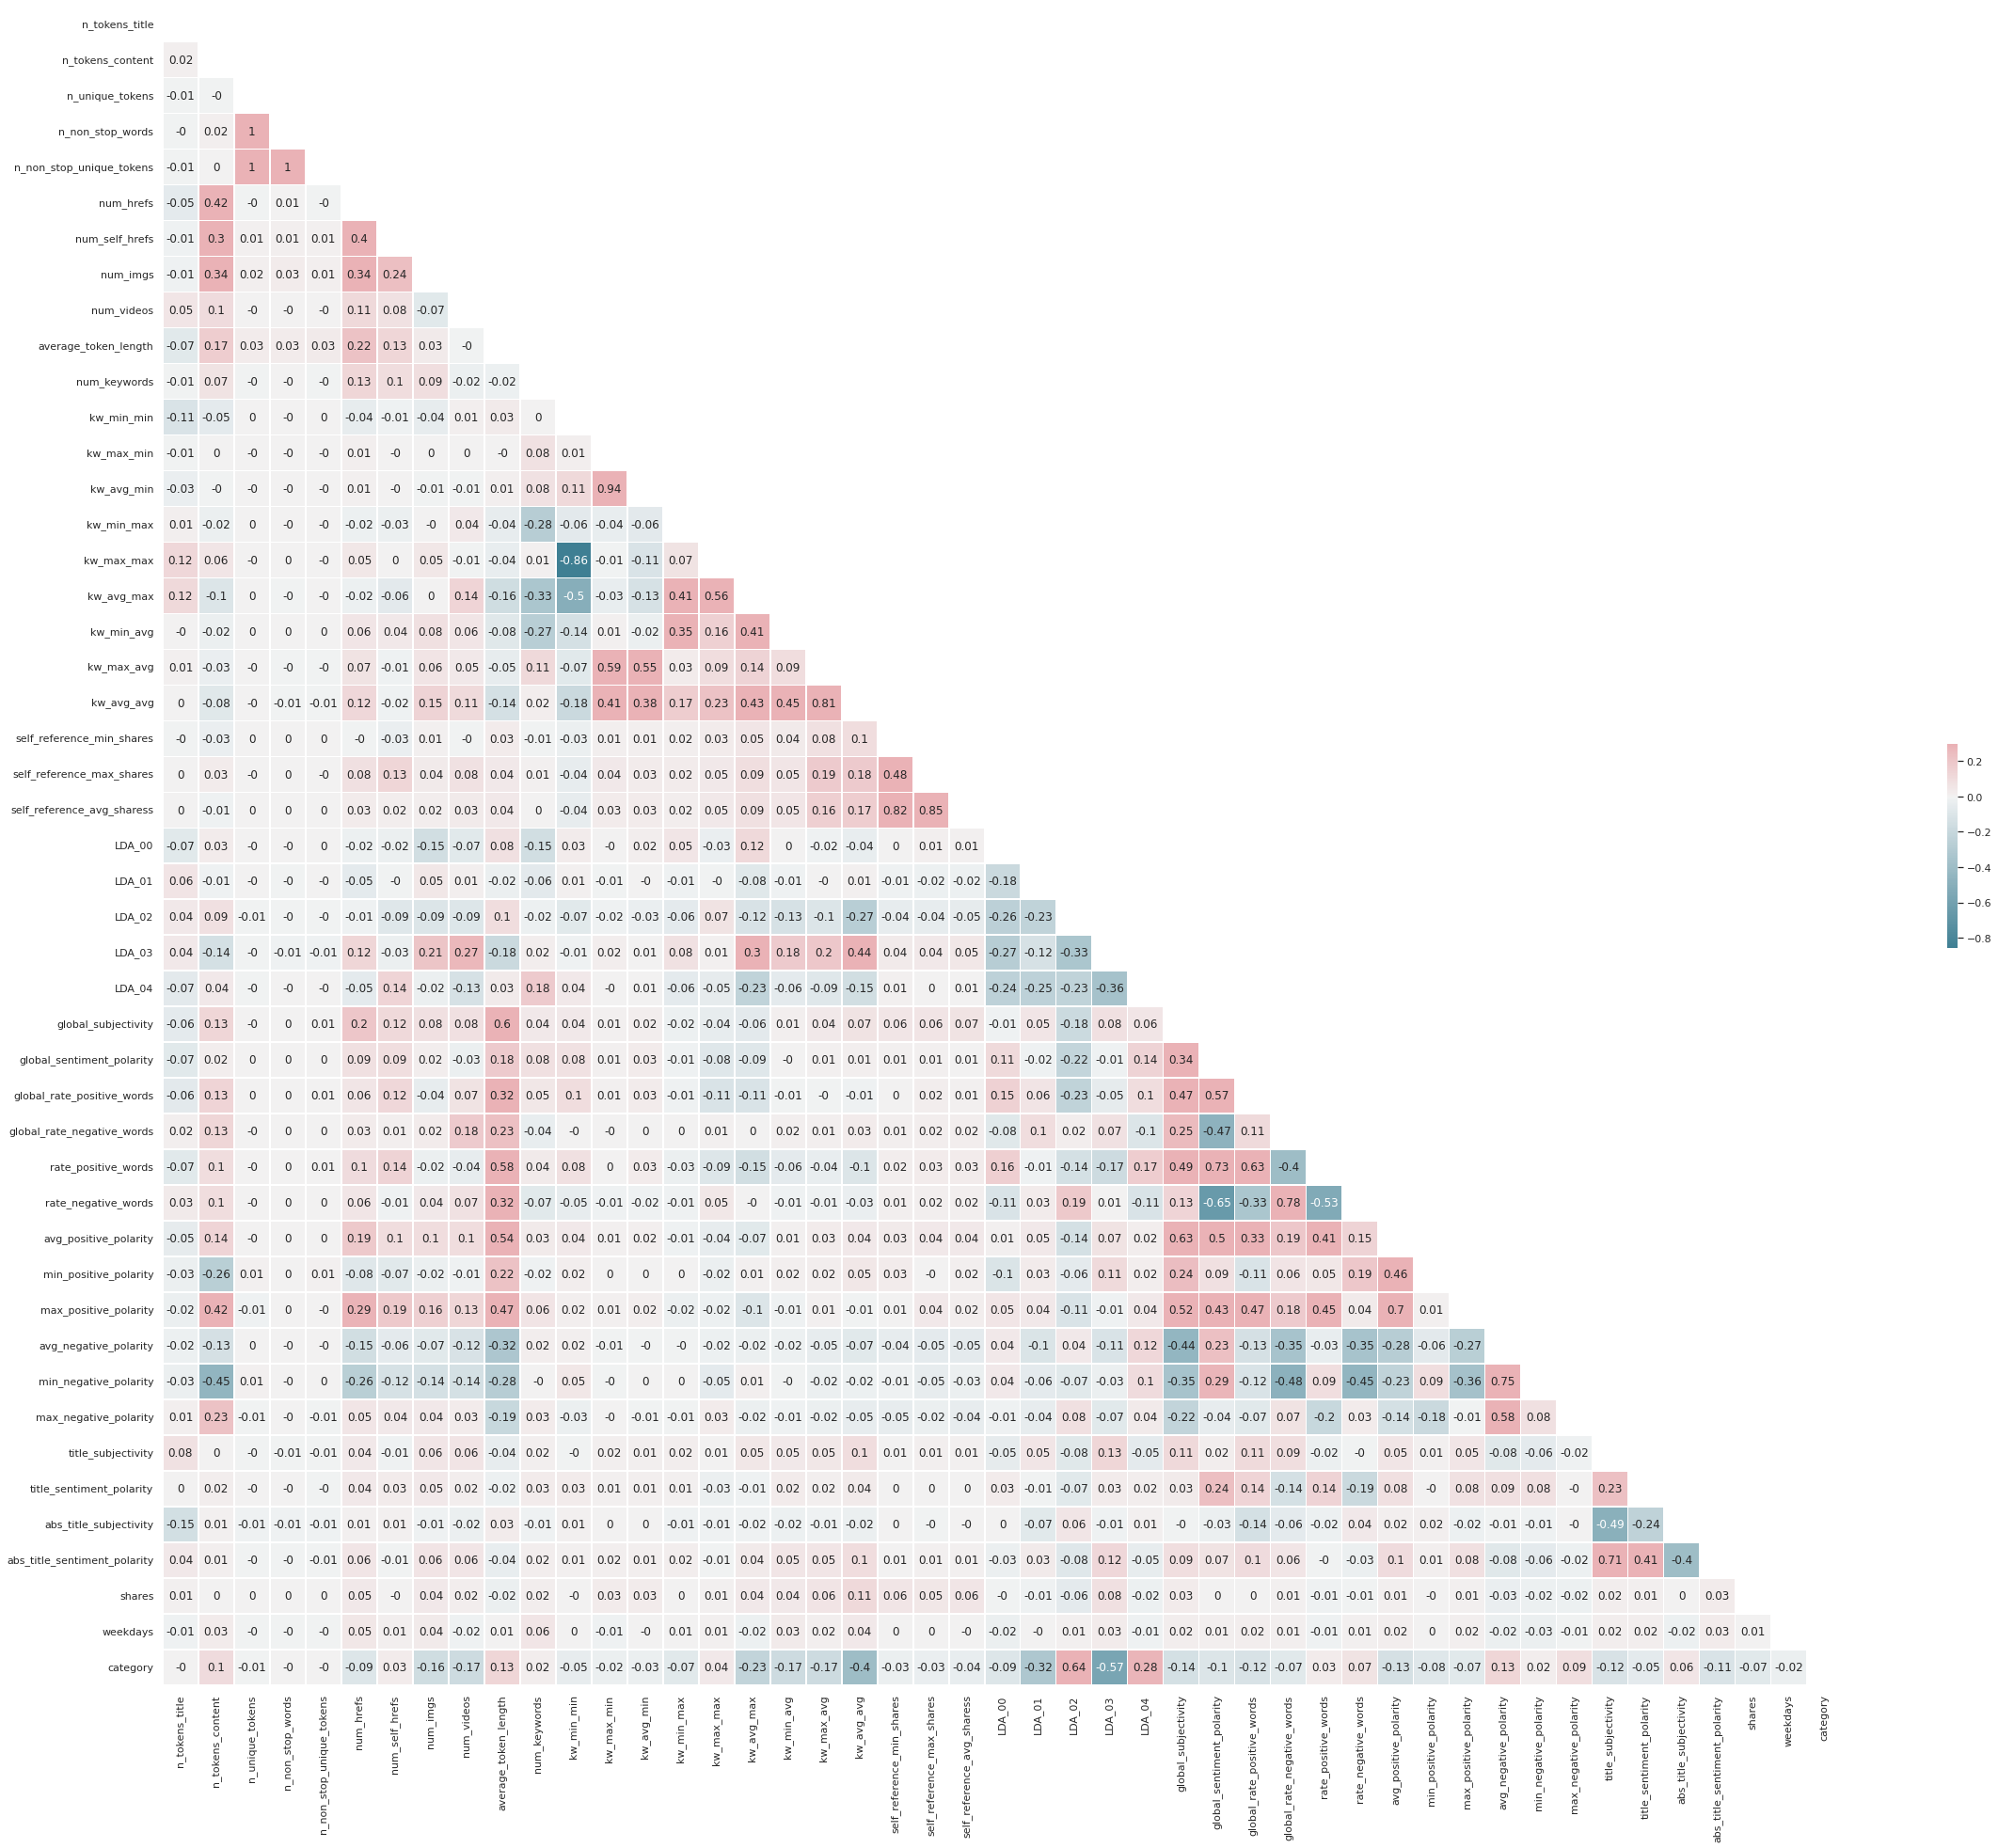

In [234]:
sns.set(style="white")
corr = pearsoncorr
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(40, 40))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot = corr.round(2), linewidths=.5, cbar_kws={"shrink": .10})

In [235]:
df3

,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,abs_title_sentiment_polarity,abs_title_subjectivity,average_token_length,avg_negative_polarity,avg_positive_polarity,...,num_self_hrefs,num_videos,rate_negative_words,rate_positive_words,self_reference_avg_sharess,self_reference_max_shares,self_reference_min_shares,title_sentiment_polarity,title_subjectivity,weekdays
0,0.500331,0.378279,0.040005,0.041263,0.040123,0.187500,0.000000,4.680365,-0.350000,0.378636,...,2.0,0.0,0.230769,0.769231,496.000000,496.0,496.0,-0.187500,0.500000,1
1,0.799756,0.050047,0.050096,0.050101,0.050001,0.000000,0.500000,4.913725,-0.118750,0.286915,...,1.0,0.0,0.266667,0.733333,0.000000,0.0,0.0,0.000000,0.000000,1
2,0.217792,0.033334,0.033351,0.033334,0.682188,0.000000,0.500000,4.393365,-0.466667,0.495833,...,1.0,0.0,0.142857,0.857143,918.000000,918.0,918.0,0.000000,0.000000,1
3,0.028573,0.419300,0.494651,0.028905,0.028572,0.000000,0.500000,4.404896,-0.369697,0.385965,...,0.0,0.0,0.333333,0.666667,0.000000,0.0,0.0,0.000000,0.000000,1
4,0.028633,0.028794,0.028575,0.028572,0.885427,0.136364,0.045455,4.682836,-0.220192,0.411127,...,19.0,0.0,0.139785,0.860215,3151.157895,16000.0,545.0,0.136364,0.454545,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,0.025038,0.025001,0.151701,0.025000,0.773260,0.000000,0.400000,4.523121,-0.260000,0.333791,...,7.0,1.0,0.277778,0.722222,37033.333333,48000.0,11400.0,0.000000,0.100000,3
39640,0.029349,0.028575,0.231866,0.681635,0.028575,1.000000,0.200000,4.405488,-0.211111,0.374825,...,7.0,48.0,0.187500,0.812500,2100.000000,2100.0,2100.0,1.000000,0.300000,3
39641,0.159004,0.025025,0.025207,0.643794,0.146970,0.136364,0.045455,5.076923,-0.356439,0.307273,...,1.0,1.0,0.423077,0.576923,1400.000000,1400.0,1400.0,0.136364,0.454545,3
39642,0.040004,0.040003,0.839987,0.040002,0.040004,0.000000,0.500000,4.975073,-0.205246,0.236851,...,1.0,0.0,0.533333,0.466667,452.000000,452.0,452.0,0.000000,0.000000,3


In [283]:
from scipy import stats
import numpy as np
X = np.abs(stats.zscore(df2))
print(X)

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            0.757447          0.695210         0.032772          0.000675   
1            0.661657          0.618794         0.016056          0.000675   
2            0.661657          0.712192         0.007645          0.000675   
3            0.661657          0.032933         0.012619          0.000675   
4            1.230482          1.115439         0.037655          0.000675   
...               ...               ...              ...               ...   
39639        0.284413          0.425630         0.005443          0.000675   
39640        0.757447          0.463838         0.042060          0.000675   
39641        0.188622          0.221852         0.009050          0.000675   
39642        2.080761          0.287592         0.002477          0.000675   
39643        0.188622          0.826817         0.043677          0.000675   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num

In [284]:
threshold = 3
print(np.where(X > 3))

(array([    0,     1,     2, ..., 39640, 39640, 39643]), array([15, 15, 15, ..., 41, 43, 14]))


In [285]:
Q1 =df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

LDA_00                          2.159075e-01
LDA_01                          1.258190e-01
LDA_02                          3.056465e-01
LDA_03                          3.471911e-01
LDA_04                          3.714121e-01
abs_title_sentiment_polarity    2.500000e-01
abs_title_subjectivity          3.333333e-01
average_token_length            3.764347e-01
avg_negative_polarity           1.414778e-01
avg_positive_polarity           1.051843e-01
category                        3.000000e+00
global_rate_negative_words      1.212375e-02
global_rate_positive_words      2.189505e-02
global_sentiment_polarity       1.200749e-01
global_subjectivity             1.121667e-01
kw_avg_avg                      1.217781e+03
kw_avg_max                      1.581331e+05
kw_avg_min                      2.152500e+02
kw_max_avg                      2.457852e+03
kw_max_max                      0.000000e+00
kw_max_min                      5.550000e+02
kw_min_avg                      2.056781e+03
kw_min_max

In [286]:
df2 = df2[(X < 3).all(axis=1)]

In [287]:
df2.shape,df.shape

((27057, 47), (39644, 63))

In [288]:
df2

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,weekdays,category
3075,5.0,230.0,0.677130,1.0,0.826772,1.0,1.0,0.0,2.0,4.569565,...,-0.183333,-0.316667,-0.050000,0.200000,0.300000,0.300000,0.300000,7800,5,2
3076,12.0,133.0,0.766917,1.0,0.813187,1.0,1.0,0.0,1.0,4.593985,...,0.000000,0.000000,0.000000,0.600000,-0.300000,0.100000,0.300000,926,5,2
3079,13.0,239.0,0.601732,1.0,0.716216,5.0,2.0,1.0,0.0,4.527197,...,-0.187500,-0.312500,-0.125000,0.000000,0.000000,0.500000,0.000000,1100,5,5
3080,11.0,621.0,0.479608,1.0,0.584687,12.0,3.0,26.0,1.0,4.879227,...,-0.298333,-0.400000,-0.200000,0.000000,0.000000,0.500000,0.000000,845,5,2
3083,11.0,971.0,0.520042,1.0,0.736014,19.0,2.0,10.0,1.0,4.559217,...,-0.276027,-0.700000,-0.050000,0.000000,0.300000,0.500000,0.300000,2000,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39637,13.0,1629.0,0.425711,1.0,0.606092,15.0,12.0,6.0,0.0,4.552486,...,-0.429534,-1.000000,-0.050000,0.783333,-0.600000,0.283333,0.600000,1400,3,2
39638,11.0,223.0,0.653153,1.0,0.825758,5.0,3.0,1.0,0.0,4.923767,...,-0.250000,-0.250000,-0.250000,0.000000,0.000000,0.500000,0.000000,1200,3,3
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,-0.260000,-0.500000,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,3,5
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,-0.356439,-0.800000,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,3,1


In [289]:
print(df2['shares'])

3075     7800
3076      926
3079     1100
3080      845
3083     2000
         ... 
39637    1400
39638    1200
39639    1800
39641    1900
39642    1100
Name: shares, Length: 27057, dtype: int64


In [290]:
df2['shares'].nunique()
df2['shares'].duplicated().sum()

25915

In [291]:
df2['shares'].value_counts()

1100     1634
1200     1410
1300     1209
1400     1155
1500      915
         ... 
334         1
199         1
165         1
92          1
34500       1
Name: shares, Length: 1142, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Countplot')]

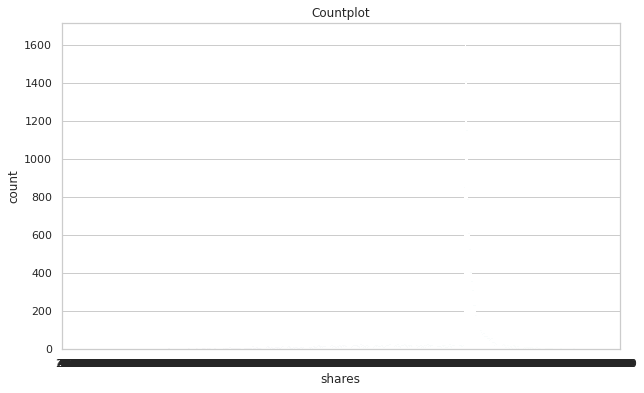

In [245]:
sns.set(style="whitegrid")
fig = plt.figure(figsize = (10,6))
sns.countplot('shares', data=df2, palette='mako').set(title='Countplot',)

In [310]:
A = pd.DataFrame(df2.shares.value_counts())

In [311]:
A.describe()

,shares
count,1142.000000
mean,23.692644
std,103.068041
min,1.000000
25%,2.000000
50%,8.000000
75%,16.000000
max,1634.000000


In [312]:
data=df2.copy()

In [313]:
print(data.shares)

3075     7800
3076      926
3079     1100
3080      845
3083     2000
         ... 
39637    1400
39638    1200
39639    1800
39641    1900
39642    1100
Name: shares, Length: 27057, dtype: int64


In [314]:
data['shares'].median()

1400.0

In [315]:
#We spilt the categories by median value.

data['shares'] = data['shares'].apply(lambda x: 0 if x <1400 else 1)

In [316]:
data.shares.value_counts()

1    14037
0    13020
Name: shares, dtype: int64

In [317]:
XA = data.copy()

In [318]:
XB = XA.loc[:, XA.columns != 'shares']
y= XA[['shares']]

In [319]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
#names = XA.columns
Xt = scaler.fit_transform(XB)
Xt = pd.DataFrame(Xt)

In [320]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
names = XB.columns
Xn = scaler.fit_transform(XB)
Xn = pd.DataFrame(Xn)

In [321]:
test_AUC = {}
train_AUC = {}
test_acc = {}
train_acc = {}

In [322]:
from sklearn.model_selection import KFold
X_train, X_test, y_train, y_test = train_test_split(Xt , y, test_size=0.2, random_state = 1)
kf = KFold(n_splits = 5, shuffle = True,  random_state=55) ##this is a must - its a validator (he asked about this durin 1st presentation)
print("Xt shape:",Xt.shape)
print("y shape:",y.shape)
print("X train:",X_train.shape,"X test:",X_test.shape)
print("y train:",y_train.shape,"y test:",y_test.shape)

Xt shape: (27057, 46)
y shape: (27057, 1)
X train: (21645, 46) X test: (5412, 46)
y train: (21645, 1) y test: (5412, 1)


logistic Regression

In [323]:
from IPython.display import Markdown, display 
def printmd(string):  
    display(Markdown(string)) 
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
kf = KFold(n_splits = 5, shuffle = True,  random_state=55)
for train, test in kf. split(Xt.index.values):
    X_train = Xt.iloc[train]
    y_train = y.iloc[train]
    X_test = Xt.iloc[test]
    y_test = y.iloc[test]

    reg = LogisticRegression() 
    reg.fit(X_train,y_train)

    pred_train = reg.predict(X_train)
    pred = reg.predict(X_test)
    
    accuracy_train = []
    precision_train = []
    ra_train = []
    recall_train = []

    accuracy = metrics.accuracy_score(y_train, pred_train)
    accuracy_train.append(accuracy)
    precision = metrics.precision_score(y_train, pred_train)
    precision_train.append(precision)
    ra= metrics.roc_auc_score(y_train, pred_train)
    ra_train.append(ra)
    recall= metrics.recall_score(y_train, pred_train)
    recall_train.append(recall)

    accuracy_test = []
    precision_test = []
    ra_test = []
    recall_test = []

    accuracy = metrics.accuracy_score(y_test, pred)
    accuracy_test.append(accuracy)
    precision = metrics.precision_score(y_test, pred)
    precision_test.append(precision)
    ra= metrics.roc_auc_score(y_test, pred)
    ra_test.append(ra)
    recall= metrics.recall_score(y_test, pred)
    recall_test.append(recall)

printmd('**TRAIN**')
print(' Accuracy:',np.mean(accuracy_train),'\n', 'Precision:', np.mean(precision_train), 
      '\n', 'Roc Auc score:', np.mean(ra_train), '\n', 'Recall:',np.mean(recall_train))

printmd('**TEST**')
print(' Accuracy:',np.mean(accuracy_test),'\n', 'Precision:', np.mean(precision_test), 
      '\n', 'Roc Auc score:', np.mean(ra_test), '\n', 'Recall:',np.mean(recall_test))



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

**TRAIN**

 Accuracy: 0.6546244109766238 
 Precision: 0.6626358219418156 
 Roc Auc score: 0.6538817646943392 
 Recall: 0.6759027529495888


**TEST**

 Accuracy: 0.6658658288671225 
 Precision: 0.6859592711682744 
 Roc Auc score: 0.6654146695130301 
 Recall: 0.6739206739206739


confuxion Matrix

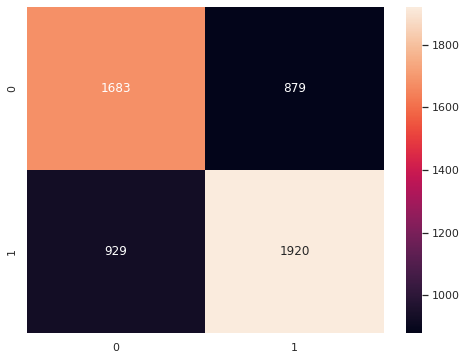

In [324]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize = (8,6))
sns.heatmap(confusion_matrix, annot=True, fmt="d")

DecisionTree

In [325]:
from sklearn.tree import DecisionTreeClassifier
kf = KFold(n_splits = 5, shuffle = True,  random_state=55)
for train, test in kf. split(Xt.index.values):
    X_train = Xt.iloc[train]
    y_train = y.iloc[train]
    X_test = Xt.iloc[test]
    y_test = y.iloc[test]

    tree = DecisionTreeClassifier(max_depth = 10)
    tree.fit(X_train,y_train)

    pred_train = tree.predict(X_train)
    pred = tree.predict(X_test)
    
    accuracy_train = []
    precision_train = []
    ra_train = []
    recall_train = []
    
    accuracy = metrics.accuracy_score(y_train, pred_train)
    accuracy_train.append(accuracy)
    precision = metrics.precision_score(y_train, pred_train)
    precision_train.append(precision)
    ra= metrics.roc_auc_score(y_train, pred_train)
    ra_train.append(ra)
    recall= metrics.recall_score(y_train, pred_train)
    recall_train.append(recall)
    
    accuracy_test = []
    precision_test = []
    ra_test = []
    recall_test = []

    accuracy = metrics.accuracy_score(y_test, pred)
    accuracy_test.append(accuracy)
    precision = metrics.precision_score(y_test, pred)
    precision_test.append(precision)
    ra= metrics.roc_auc_score(y_test, pred)
    ra_test.append(ra)
    recall= metrics.recall_score(y_test, pred)
    recall_test.append(recall)

In [326]:
   tree.score(X_test,y_test)

0.6359268157457032

In [327]:
printmd('**TRAIN**')
print(' Accuracy:',np.mean(accuracy_train),'\n', 'Precision:', np.mean(precision_train), 
      '\n', 'Roc Auc score:', np.mean(ra_train), '\n', 'Recall:',np.mean(recall_train))

printmd('**TEST**')
print(' Accuracy:',np.mean(accuracy_test),'\n', 'Precision:', np.mean(precision_test), 
      '\n', 'Roc Auc score:', np.mean(ra_test), '\n', 'Recall:',np.mean(recall_test))

**TRAIN**

 Accuracy: 0.7525177861960639 
 Precision: 0.7738330046022354 
 Roc Auc score: 0.7530798321399051 
 Recall: 0.7364140150160887


**TEST**

 Accuracy: 0.6359268157457032 
 Precision: 0.6679403897592663 
 Roc Auc score: 0.637180239639256 
 Recall: 0.6135486135486136


 KNN model

In [328]:
from sklearn.neighbors import KNeighborsClassifier
kf = KFold(n_splits = 5, shuffle = True,  random_state=55)

for train, test in kf. split(Xn.index.values):
    X_train = Xn.iloc[train]
    y_train = y.iloc[train]
    X_test = Xn.iloc[test]
    y_test = y.iloc[test]

    clf = KNeighborsClassifier(n_neighbors=25)
    clf.fit(X_train,y_train)

    pred_train = clf.predict(X_train)
    pred = clf.predict(X_test)
    
    accuracy_train = []
    precision_train = []
    ra_train = []
    recall_train = []
    
    accuracy = metrics.accuracy_score(y_train, pred_train)
    accuracy_train.append(accuracy)
    precision = metrics.precision_score(y_train, pred_train)
    precision_train.append(precision)
    ra= metrics.roc_auc_score(y_train, pred_train)
    ra_train.append(ra)
    recall= metrics.recall_score(y_train, pred_train)
    recall_train.append(recall)
    
    accuracy_test = []
    precision_test = []
    ra_test = []
    recall_test = []

    accuracy = metrics.accuracy_score(y_test, pred)
    accuracy_test.append(accuracy)
    precision = metrics.precision_score(y_test, pred)
    precision_test.append(precision)
    ra= metrics.roc_auc_score(y_test, pred)
    ra_test.append(ra)
    recall= metrics.recall_score(y_test, pred)
    recall_test.append(recall)
    
printmd('**TRAIN**')
print(' Accuracy:',np.mean(accuracy_train),'\n', 'Precision:', np.mean(precision_train), 
      '\n', 'Roc Auc score:', np.mean(ra_train), '\n', 'Recall:',np.mean(recall_train))

printmd('**TEST**')
print(' Accuracy:',np.mean(accuracy_test),'\n', 'Precision:', np.mean(precision_test), 
      '\n', 'Roc Auc score:', np.mean(ra_test), '\n', 'Recall:',np.mean(recall_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

**TRAIN**

 Accuracy: 0.6693615448581725 
 Precision: 0.7003678298041555 
 Roc Auc score: 0.6707460534888589 
 Recall: 0.6296925277082589


**TEST**

 Accuracy: 0.6342635372389577 
 Precision: 0.6778413736713 
 Roc Auc score: 0.6371931863735142 
 Recall: 0.581958581958582


RandomForest model

In [329]:
from sklearn.ensemble import RandomForestClassifier
for train, test in kf. split(Xt.index.values):
    X_train = Xt.iloc[train]
    y_train = y.iloc[train]
    X_test = Xt.iloc[test]
    y_test = y.iloc[test]

    rf = RandomForestClassifier(n_estimators=200, max_depth=10,random_state=55,n_jobs = -1)
    rf.fit(X_train,y_train)
 
    pred_train = rf.predict(X_train)
    pred = rf.predict(X_test)
    
    accuracy_train = []
    precision_train = []
    ra_train = []
    recall_train = []
    
    accuracy = metrics.accuracy_score(y_train, pred_train)
    accuracy_train.append(accuracy)
    precision = metrics.precision_score(y_train, pred_train)
    precision_train.append(precision)
    ra= metrics.roc_auc_score(y_train, pred_train)
    ra_train.append(ra)
    recall= metrics.recall_score(y_train, pred_train)
    recall_train.append(recall)
    
    accuracy_test = []
    precision_test = []
    ra_test = []
    recall_test = []

    accuracy = metrics.accuracy_score(y_test, pred)
    accuracy_test.append(accuracy)
    precision = metrics.precision_score(y_test, pred)
    precision_test.append(precision)
    ra= metrics.roc_auc_score(y_test, pred)
    ra_test.append(ra)
    recall= metrics.recall_score(y_test, pred)
    recall_test.append(recall)

 
    
printmd('**TRAIN**')
print(' Accuracy:',np.mean(accuracy_train),'\n', 'Precision:', np.mean(precision_train), 
      '\n', 'Roc Auc score:', np.mean(ra_train), '\n', 'Recall:',np.mean(recall_train))

printmd('**TEST**')
print(' Accuracy:',np.mean(accuracy_test),'\n', 'Precision:', np.mean(precision_test), 
      '\n', 'Roc Auc score:', np.mean(ra_test), '\n', 'Recall:',np.mean(recall_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/usr/loc

**TRAIN**

 Accuracy: 0.8014413748498568 
 Precision: 0.7948981338811847 
 Roc Auc score: 0.8004447604675473 
 Recall: 0.8299964247407937


**TEST**

 Accuracy: 0.6804657179818887 
 Precision: 0.6879194630872483 
 Roc Auc score: 0.6782765307355472 
 Recall: 0.7195507195507196


SVC Model

In [340]:

from sklearn.svm import SVC

kf = KFold(n_splits = 5, shuffle = True,  random_state=55)
for train, test in kf. split(Xt.index.values):
    X_train = Xt.iloc[train]
    y_train = y.iloc[train]
    X_test = Xt.iloc[test]
    y_test = y.iloc[test]

    svmc = SVC(kernel='linear')
    svmc.fit(X_train,y_train)

    pred_train = svmc.predict(X_train)
    pred = tree.predict(X_test)
    
    accuracy_train = []
    precision_train = []
    ra_train = []
    recall_train = []
    
    accuracy = metrics.accuracy_score(y_train, pred_train)
    accuracy_train.append(accuracy)
    precision = metrics.precision_score(y_train, pred_train)
    precision_train.append(precision)
    ra= metrics.roc_auc_score(y_train, pred_train)
    ra_train.append(ra)
    recall= metrics.recall_score(y_train, pred_train)
    recall_train.append(recall)
    
    accuracy_test = []
    precision_test = []
    ra_test = []
    recall_test = []

    accuracy = metrics.accuracy_score(y_test, pred)
    accuracy_test.append(accuracy)
    precision = metrics.precision_score(y_test, pred)
    precision_test.append(precision)
    ra= metrics.roc_auc_score(y_test, pred)
    ra_test.append(ra)
    recall= metrics.recall_score(y_test, pred)
    recall_test.append(recall)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [341]:
printmd('**TRAIN**')
print(' Accuracy:',np.mean(accuracy_train),'\n', 'Precision:', np.mean(precision_train), 
      '\n', 'Roc Auc score:', np.mean(ra_train), '\n', 'Recall:',np.mean(recall_train))

printmd('**TEST**')
print(' Accuracy:',np.mean(accuracy_test),'\n', 'Precision:', np.mean(precision_test), 
      '\n', 'Roc Auc score:', np.mean(ra_test), '\n', 'Recall:',np.mean(recall_test))

**TRAIN**

 Accuracy: 0.6525455049431765 
 Precision: 0.6601729710841269 
 Roc Auc score: 0.6517458994429803 
 Recall: 0.6754558455488023


**TEST**

 Accuracy: 0.6359268157457032 
 Precision: 0.6679403897592663 
 Roc Auc score: 0.637180239639256 
 Recall: 0.6135486135486136


Naive Bayes

In [342]:

from sklearn.naive_bayes import GaussianNB
kf = KFold(n_splits = 5, shuffle = True,  random_state=55)
for train, test in kf. split(Xt.index.values):
    X_train = Xt.iloc[train]
    y_train = y.iloc[train]
    X_test = Xt.iloc[test]
    y_test = y.iloc[test]

    nb = GaussianNB()
    nb.fit(X_train,y_train)

    pred_train = nb.predict(X_train)
    pred = nb.predict(X_test)
    
    accuracy_train = []
    precision_train = []
    ra_train = []
    recall_train = []
    
    accuracy = metrics.accuracy_score(y_train, pred_train)
    accuracy_train.append(accuracy)
    precision = metrics.precision_score(y_train, pred_train)
    precision_train.append(precision)
    ra= metrics.roc_auc_score(y_train, pred_train)
    ra_train.append(ra)
    recall= metrics.recall_score(y_train, pred_train)
    recall_train.append(recall)
    
    accuracy_test = []
    precision_test = []
    ra_test = []
    recall_test = []

    accuracy = metrics.accuracy_score(y_test, pred)
    accuracy_test.append(accuracy)
    precision = metrics.precision_score(y_test, pred)
    precision_test.append(precision)
    ra= metrics.roc_auc_score(y_test, pred)
    ra_test.append(ra)
    recall= metrics.recall_score(y_test, pred)
    recall_test.append(recall)
    
printmd('**TRAIN**')
print(' Accuracy:',np.mean(accuracy_train),'\n', 'Precision:', np.mean(precision_train), 
      '\n', 'Roc Auc score:', np.mean(ra_train), '\n', 'Recall:',np.mean(recall_train))

printmd('**TEST**')
print(' Accuracy:',np.mean(accuracy_test),'\n', 'Precision:', np.mean(precision_test), 
      '\n', 'Roc Auc score:', np.mean(ra_test), '\n', 'Recall:',np.mean(recall_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

**TRAIN**

 Accuracy: 0.6111983738335027 
 Precision: 0.6677559912854031 
 Roc Auc score: 0.6153195703289177 
 Recall: 0.493117626027887


**TEST**

 Accuracy: 0.6030308630567363 
 Precision: 0.6771096513390601 
 Roc Auc score: 0.6104629752170736 
 Recall: 0.47034047034047033


from all this Model used Random forest seems to have the higher 
accuracy than other model.

Hence will use Rando forest in Model with GridSearchCV

In [343]:
from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits = 5, shuffle = True,  random_state=100000)
param_grid = { 
    'n_estimators': [100, 200, 300],
    'max_depth' : [5,10,15]
}

model = RandomForestClassifier(random_state=42)
grid = RandomizedSearchCV(model,param_grid, cv = 5)
grid.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",grid.best_params_)
print("accuracy :",grid.best_score_)
pred_train = grid.predict(X_train)
pred = grid.predict(X_test) 



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to 

tuned hpyerparameters :(best parameters)  {'n_estimators': 200, 'max_depth': 15}
accuracy : 0.6602615370744702


In [344]:
printmd('**TRAIN**')
print(' Accuracy:',np.mean(metrics.accuracy_score(y_train, pred_train)),'\n', 'Precision:', np.mean(metrics.precision_score(y_train, pred_train)), 
      '\n', 'Roc Auc score:', np.mean(metrics.roc_auc_score(y_train, pred_train)), '\n', 'Recall:', np.mean(metrics.recall_score(y_train, pred_train)))

printmd('**TEST**')
print(' Accuracy:',np.mean(metrics.accuracy_score(y_test, pred)),'\n', 'Precision:', np.mean(metrics.precision_score(y_test, pred)), 
      '\n', 'Roc Auc score:', np.mean(metrics.roc_auc_score(y_test, pred)), '\n', 'Recall:',np.mean(metrics.recall_score(y_test, pred)))

**TRAIN**

 Accuracy: 0.9731590132126028 
 Precision: 0.9797376752600633 
 Roc Auc score: 0.9733359011065116 
 Recall: 0.9680908115838398


**TEST**

 Accuracy: 0.6797264830900018 
 Precision: 0.6920165175498968 
 Roc Auc score: 0.6782626249839364 
 Recall: 0.7058617058617058


# Conclusion

### All Models used perform similarly.Hence we  Random Forest for our datasets gives high  accuracy compaire to other Machine learning Models.